In [1]:
__author__ = 'xuanzee'

In [2]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
pd.options.mode.chained_assignment = None

## 1. Inspect the Data

In [4]:
data = pd.read_csv('states0.csv')

In [5]:
print(data.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


In [6]:
print(data.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


* Need to delete unnamed column
* Percentage by ethnicity to remove % sign and change to numeric; then reshape to make an ethnicity variable
* Income to remove $ sign and change to numeric
* GenderPop to split into two variables and remove M or F

## 2. Clean and Convert the Data

### Get data in one place

In [7]:
list_data = []

files = glob.glob('states*.csv')
for file in files:
    state_census = pd.read_csv(file)
    list_data.append(state_census)
    
us_census = pd.concat(list_data)

In [8]:
#Drop extra column

us_census = us_census.drop(columns=['Unnamed: 0'])

In [9]:
#Drop duplicates

us_census = us_census.drop_duplicates()

In [10]:
print(len(us_census))

51


### Modify the ethnicity percentage columns

In [11]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [12]:
ethnicity_list = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

In [13]:
#Remove % sign and change to numeric at the same time
for ethnicity in ethnicity_list:
    us_census[ethnicity] = us_census[ethnicity].replace('[,\%]','',regex=True)
    us_census[ethnicity] = pd.to_numeric(us_census[ethnicity])

In [14]:
print(us_census.head())

            State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
0    Rhode Island   1053661     13.36  74.33   5.68    0.35   3.25     0.04   
1  South Carolina   4777576      5.06  62.89  28.75    0.29   1.25     0.05   
2    South Dakota    843190      3.24  82.50   1.42    9.42   1.02     0.04   
3       Tennessee   6499615      4.72  73.49  18.28    0.23   1.41     0.04   
4           Texas  26538614     38.05  44.69  11.65    0.26   3.67     0.07   

        Income            GenderPop  
0  $59,125.27       510388M_543273F  
1  $46,296.81     2322409M_2455167F  
2  $51,805.41       423477M_419713F  
3  $47,328.08     3167756M_3331859F  
4  $55,874.52   13171316M_13367298F  


In [15]:
print(us_census.dtypes)

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income        object
GenderPop     object
dtype: object


### Modify the Income column

In [16]:
us_census.Income = us_census.Income.replace('[\$,]','',regex=True)

In [17]:
us_census.Income = pd.to_numeric(us_census.Income)

In [18]:
print(us_census.dtypes)

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
dtype: object


### Split the GenderPop column

In [19]:
us_census['MalePop'] = us_census.GenderPop.str.split('_',expand=True)[0]
us_census.MalePop = us_census.MalePop.replace('[,M]','',regex=True)
us_census.MalePop = pd.to_numeric(us_census.MalePop)

In [20]:
us_census['FemalePop'] = us_census.GenderPop.str.split('_',expand=True)[1]
us_census.FemalePop = us_census.FemalePop.replace('[,F]','',regex=True)
us_census.FemalePop = pd.to_numeric(us_census.FemalePop)

In [21]:
us_census = us_census.drop(columns=['GenderPop'])

In [22]:
print(us_census.head())

            State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
0    Rhode Island   1053661     13.36  74.33   5.68    0.35   3.25     0.04   
1  South Carolina   4777576      5.06  62.89  28.75    0.29   1.25     0.05   
2    South Dakota    843190      3.24  82.50   1.42    9.42   1.02     0.04   
3       Tennessee   6499615      4.72  73.49  18.28    0.23   1.41     0.04   
4           Texas  26538614     38.05  44.69  11.65    0.26   3.67     0.07   

     Income   MalePop   FemalePop  
0  59125.27    510388    543273.0  
1  46296.81   2322409   2455167.0  
2  51805.41    423477    419713.0  
3  47328.08   3167756   3331859.0  
4  55874.52  13171316  13367298.0  


In [23]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 4
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      51 non-null     object 
 1   TotalPop   51 non-null     int64  
 2   Hispanic   51 non-null     float64
 3   White      51 non-null     float64
 4   Black      51 non-null     float64
 5   Native     51 non-null     float64
 6   Asian      51 non-null     float64
 7   Pacific    47 non-null     float64
 8   Income     51 non-null     float64
 9   MalePop    51 non-null     int64  
 10  FemalePop  49 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 4.8+ KB


### Create separate dataframe focusing on population vs income

In [24]:
df_income_pop = us_census[['State','TotalPop','Income','MalePop','FemalePop']]

In [25]:
df_income_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      51 non-null     object 
 1   TotalPop   51 non-null     int64  
 2   Income     51 non-null     float64
 3   MalePop    51 non-null     int64  
 4   FemalePop  49 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.4+ KB


In [26]:
df_income_pop[df_income_pop['FemalePop'].isnull() == True]

,State,TotalPop,Income,MalePop,FemalePop
0,Maryland,5930538,78765.40,2872643,NaN
1,Montana,1014699,47645.68,510163,NaN


In [27]:
df_income_pop['FemalePop'].fillna(df_income_pop['TotalPop'] - df_income_pop['MalePop'], inplace=True)

In [28]:
df_income_pop[(df_income_pop['State'] == 'Maryland') | (df_income_pop['State'] == 'Montana')]

,State,TotalPop,Income,MalePop,FemalePop
0,Maryland,5930538,78765.40,2872643,3057895.0
1,Montana,1014699,47645.68,510163,504536.0


In [29]:
df_income_pop['FemalePop%'] = df_income_pop['FemalePop'] / df_income_pop['TotalPop'] * 100
df_income_pop['FemalePop%'] = df_income_pop['FemalePop%'].round(decimals=1)
df_income_pop.head()

,State,TotalPop,Income,MalePop,FemalePop,FemalePop%
0,Rhode Island,1053661,59125.27,510388,543273.0,51.6
1,South Carolina,4777576,46296.81,2322409,2455167.0,51.4
2,South Dakota,843190,51805.41,423477,419713.0,49.8
3,Tennessee,6499615,47328.08,3167756,3331859.0,51.3
4,Texas,26538614,55874.52,13171316,13367298.0,50.4


### Create separate dataframe focusing on population by race/ethnicity

In [30]:
df_ethnicity_pop = us_census[['State','TotalPop','Hispanic','White','Black','Native','Asian','Pacific']]

In [31]:
df_ethnicity_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 4
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     51 non-null     object 
 1   TotalPop  51 non-null     int64  
 2   Hispanic  51 non-null     float64
 3   White     51 non-null     float64
 4   Black     51 non-null     float64
 5   Native    51 non-null     float64
 6   Asian     51 non-null     float64
 7   Pacific   47 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.6+ KB


In [32]:
df_ethnicity_pop['Pacific'].fillna(100-df_ethnicity_pop['Hispanic']-df_ethnicity_pop['White']
                                   -df_ethnicity_pop['Black']-df_ethnicity_pop['Native']
                                   -df_ethnicity_pop['Asian'], inplace=True)

In [33]:
df_ethnicity_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 4
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     51 non-null     object 
 1   TotalPop  51 non-null     int64  
 2   Hispanic  51 non-null     float64
 3   White     51 non-null     float64
 4   Black     51 non-null     float64
 5   Native    51 non-null     float64
 6   Asian     51 non-null     float64
 7   Pacific   51 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.6+ KB


In [34]:
for ethnicity in ethnicity_list:
    df_ethnicity_pop[ethnicity] = df_ethnicity_pop['TotalPop'] / 100 * df_ethnicity_pop[ethnicity]

In [35]:
df_ethnicity_pop.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific
0,Rhode Island,1053661,1.407691e+05,7.831862e+05,5.984794e+04,3687.8135,34243.9825,421.4644
1,South Carolina,4777576,2.417453e+05,3.004618e+06,1.373553e+06,13854.9704,59719.7000,2388.7880
2,South Dakota,843190,2.731936e+04,6.956318e+05,1.197330e+04,79428.4980,8600.5380,337.2760
3,Tennessee,6499615,3.067818e+05,4.776567e+06,1.188130e+06,14949.1145,91644.5715,2599.8460
4,Texas,26538614,1.009794e+07,1.186011e+07,3.091749e+06,69000.3964,973967.1338,18577.0298


In [36]:
df_ethnicity_pop_reshaped = pd.melt(frame=df_ethnicity_pop, id_vars=['State','TotalPop'],
                          value_vars=['Hispanic','White','Black','Native','Asian','Pacific'],
                          var_name='Ethnicity', value_name='Population')

In [37]:
df_ethnicity_pop_reshaped.head()

,State,TotalPop,Ethnicity,Population
0,Rhode Island,1053661,Hispanic,1.407691e+05
1,South Carolina,4777576,Hispanic,2.417453e+05
2,South Dakota,843190,Hispanic,2.731936e+04
3,Tennessee,6499615,Hispanic,3.067818e+05
4,Texas,26538614,Hispanic,1.009794e+07


## 3. Visualize the data

### Avg state income vs proportion of women population

<Axes: xlabel='FemalePop%', ylabel='Income'>

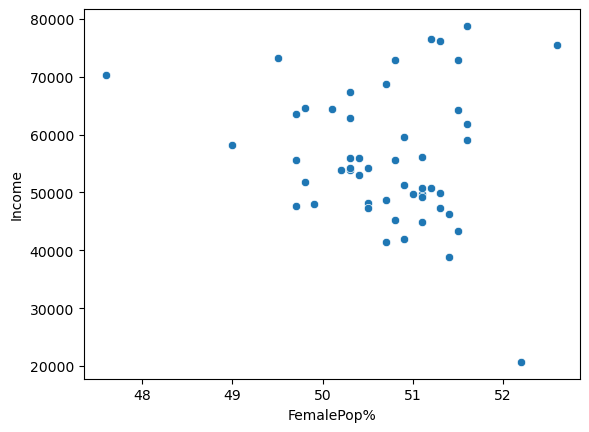

In [38]:
sns.scatterplot(data=df_income_pop, x='FemalePop%', y='Income')

### Population by ethnicity

In [39]:
print(len(ethnicity_list))

6


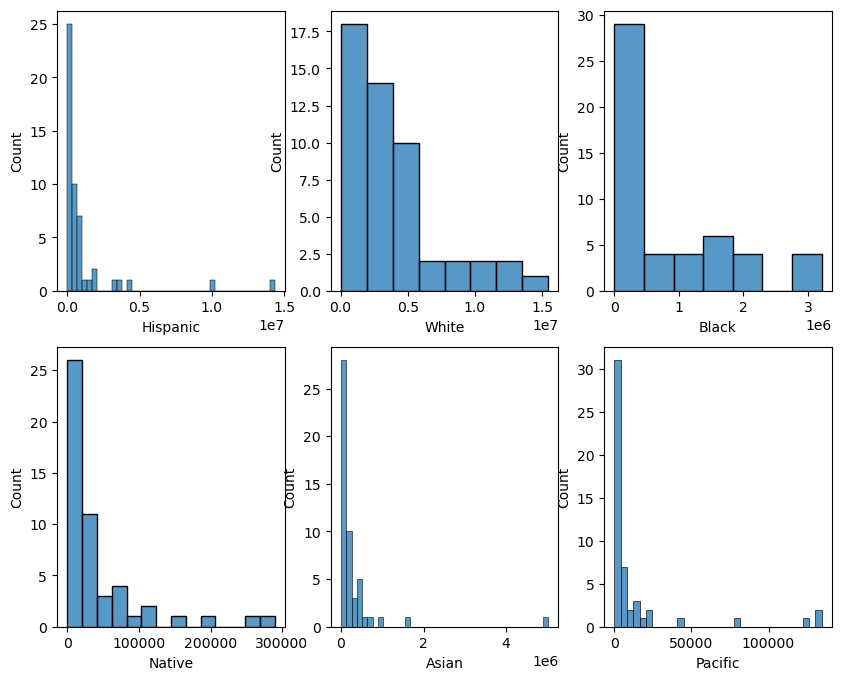

In [40]:
plt.figure(figsize=(10,8))
i=1
for ethnicity in ethnicity_list:
    ax = plt.subplot(2,3,i)
    i += 1
    sns.histplot(df_ethnicity_pop[ethnicity])